In [1]:
import pandas as pd
import numpy as np
import datetime
import time
import pickle
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
from random import choices, sample
from gensim.models import Word2Vec
import gc
pd.set_option('display.float_format',lambda x : '%.2f' % x)
from math import log10

In [2]:
with open('./lt_df_dart_108days.pkl', 'rb') as file:
    lt_df = pickle.load(file)

In [3]:
for idx, df in tqdm(enumerate(lt_df)):
    lt_df[idx] = lt_df[idx].reindex(columns=['uid', 'hist_iid', 'target_iid', 'next_iid', 'knn_rank', 'NN_rank', 'DIN_rank', 'DIEN_rank'])

108it [00:00, 907.16it/s]


In [4]:
lt_df[0]

,uid,hist_iid,target_iid,next_iid,knn_rank,NN_rank,DIN_rank,DIEN_rank
0,00071285-58af-4f79-bdcb-fe6be966464c,e33e0592b86611e99f6eacde48001122,e33e0592b86611e99f6eacde48001122,e32b67f4b86611e9bc33acde48001122,16,4,81.00,35
1,0016e69b-50e1-4aa7-90aa-9aec76b554ab,a8853924b86711e9aebcacde48001122/ba76834ab8671...,ba7a8f6cb86711e98024acde48001122,ba76d4b4b86711e98d41acde48001122,59,21,47.00,84
2,0021575a-bdc2-43bf-b6ef-e5414a1ec2d1,e328d2eeb86611e9a1deacde48001122,e328d2eeb86611e9a1deacde48001122,06f0a648b86711e9b66eacde48001122,5,8,42.00,5
3,0022550c-5c81-480d-b196-c3a370ce2cf6,00b66582b86811e98929acde48001122/06f35c26b8671...,00b66582b86811e98929acde48001122,06f35c26b86711e99f45acde48001122,1,5,16.00,85
4,0023d516-3dd0-4fc6-b10b-514152f6701c,e3252218b86611e99d55acde48001122/47183268b8671...,47183268b86711e9acd6acde48001122,471831fab86711e98ae4acde48001122,3,2,75.00,12
...,...,...,...,...,...,...,...,...
6552,ffbc79ac-65d9-4ef7-bc8f-a867edbfbc66,e34fe668b86611e99ad7acde48001122/e335ae10b8661...,e335ae10b86611e99ad4acde48001122,06f5211eb86711e98be4acde48001122,15,60,16.00,44
6553,ffc63cdf-6cd4-4c0b-bc7b-77ba79d1c3f1,7e6f5be2b86711e98b6facde48001122/7e98ebd8b8671...,072045a6b86711e99d06acde48001122,46d06168b86711e9bf47acde48001122,42,9,13.00,52
6554,ffde1bcb-3cf6-4f35-a66e-74889c5256d2,e378641cb86611e98abbacde48001122,e378641cb86611e98abbacde48001122,e379daaeb86611e9b229acde48001122,3,5,63.00,62
6555,ffeeed4a-45a7-4825-8dc8-d8f60a8e0067,5bce79b0b86711e9bd50acde48001122/5bbf8cb6b8671...,5bce0a8cb86711e9a52cacde48001122,06e11214b86711e9a47facde48001122,4,22,15.00,5


In [5]:
lt_df[0].columns

Index(['uid', 'hist_iid', 'target_iid', 'next_iid', 'knn_rank', 'NN_rank',
       'DIN_rank', 'DIEN_rank'],
      dtype='object')

In [6]:
def gen_label(df):
    if df.knn_rank <= df.NN_rank and  df.knn_rank <= df.DIN_rank and df.knn_rank <= df.DIEN_rank:
        label = 0
    elif df.NN_rank <= df.knn_rank and  df.NN_rank <= df.DIN_rank and df.NN_rank <= df.DIEN_rank:
        label = 1
    elif df.DIN_rank <= df.knn_rank and  df.DIN_rank <= df.NN_rank and df.DIN_rank <= df.DIEN_rank:
        label = 2
    elif df.DIEN_rank <= df.knn_rank and  df.DIEN_rank <= df.NN_rank and df.DIEN_rank <= df.DIN_rank:
        label = 3
    return label

In [7]:
for df in tqdm(lt_df):
    df['label'] = df.apply(gen_label, axis=1)

100%|██████████| 108/108 [01:01<00:00,  1.76it/s]


In [8]:
for df in tqdm(lt_df):
    df['hist_len'] = df.apply(lambda df: len(str(df['hist_iid']).split('/')), axis=1)

100%|██████████| 108/108 [00:07<00:00, 15.03it/s]


In [9]:
from keras.utils import to_categorical
for df in tqdm(lt_df):
    df['train_label'] = df.apply(lambda df: to_categorical(df['label'], num_classes=4), axis=1)

Using TensorFlow backend.
100%|██████████| 108/108 [01:03<00:00,  1.70it/s]


In [10]:
lt_df[0]

,uid,hist_iid,target_iid,next_iid,knn_rank,NN_rank,DIN_rank,DIEN_rank,label,hist_len,train_label
0,00071285-58af-4f79-bdcb-fe6be966464c,e33e0592b86611e99f6eacde48001122,e33e0592b86611e99f6eacde48001122,e32b67f4b86611e9bc33acde48001122,16,4,81.00,35,1,1,"[0.0, 1.0, 0.0, 0.0]"
1,0016e69b-50e1-4aa7-90aa-9aec76b554ab,a8853924b86711e9aebcacde48001122/ba76834ab8671...,ba7a8f6cb86711e98024acde48001122,ba76d4b4b86711e98d41acde48001122,59,21,47.00,84,1,3,"[0.0, 1.0, 0.0, 0.0]"
2,0021575a-bdc2-43bf-b6ef-e5414a1ec2d1,e328d2eeb86611e9a1deacde48001122,e328d2eeb86611e9a1deacde48001122,06f0a648b86711e9b66eacde48001122,5,8,42.00,5,0,1,"[1.0, 0.0, 0.0, 0.0]"
3,0022550c-5c81-480d-b196-c3a370ce2cf6,00b66582b86811e98929acde48001122/06f35c26b8671...,00b66582b86811e98929acde48001122,06f35c26b86711e99f45acde48001122,1,5,16.00,85,0,4,"[1.0, 0.0, 0.0, 0.0]"
4,0023d516-3dd0-4fc6-b10b-514152f6701c,e3252218b86611e99d55acde48001122/47183268b8671...,47183268b86711e9acd6acde48001122,471831fab86711e98ae4acde48001122,3,2,75.00,12,1,2,"[0.0, 1.0, 0.0, 0.0]"
...,...,...,...,...,...,...,...,...,...,...,...
6552,ffbc79ac-65d9-4ef7-bc8f-a867edbfbc66,e34fe668b86611e99ad7acde48001122/e335ae10b8661...,e335ae10b86611e99ad4acde48001122,06f5211eb86711e98be4acde48001122,15,60,16.00,44,0,2,"[1.0, 0.0, 0.0, 0.0]"
6553,ffc63cdf-6cd4-4c0b-bc7b-77ba79d1c3f1,7e6f5be2b86711e98b6facde48001122/7e98ebd8b8671...,072045a6b86711e99d06acde48001122,46d06168b86711e9bf47acde48001122,42,9,13.00,52,1,3,"[0.0, 1.0, 0.0, 0.0]"
6554,ffde1bcb-3cf6-4f35-a66e-74889c5256d2,e378641cb86611e98abbacde48001122,e378641cb86611e98abbacde48001122,e379daaeb86611e9b229acde48001122,3,5,63.00,62,0,1,"[1.0, 0.0, 0.0, 0.0]"
6555,ffeeed4a-45a7-4825-8dc8-d8f60a8e0067,5bce79b0b86711e9bd50acde48001122/5bbf8cb6b8671...,5bce0a8cb86711e9a52cacde48001122,06e11214b86711e9a47facde48001122,4,22,15.00,5,0,3,"[1.0, 0.0, 0.0, 0.0]"


In [11]:
lt_df[0]['label'].value_counts()

0    3041
1    2241
2     673
3     602
Name: label, dtype: int64

In [12]:
lt_df[0][lt_df[0]['label']==0].describe()

,knn_rank,NN_rank,DIN_rank,DIEN_rank,label,hist_len
count,3041.00,3041.00,3041.00,3041.00,3041.00,3041.00
mean,6.28,19.96,44.26,54.76,0.00,3.97
std,8.90,21.55,26.51,28.95,0.00,5.70
min,1.00,1.00,1.00,1.00,0.00,1.00
25%,1.00,4.00,22.00,30.00,0.00,1.00
50%,3.00,11.00,43.00,57.00,0.00,2.00
75%,7.00,29.00,66.00,80.00,0.00,4.00
max,70.00,99.00,99.00,99.00,0.00,91.00


In [13]:
lt_df[0][lt_df[0]['label']==1].describe()

,knn_rank,NN_rank,DIN_rank,DIEN_rank,label,hist_len
count,2241.00,2241.00,2241.00,2241.00,2241.00,2241.00
mean,26.14,8.06,47.35,54.46,1.00,4.50
std,25.11,10.28,26.96,28.08,0.00,9.06
min,2.00,1.00,1.00,1.00,1.00,1.00
25%,7.00,2.00,24.00,31.00,1.00,1.00
50%,17.00,4.00,46.00,56.00,1.00,2.00
75%,39.00,10.00,70.00,79.00,1.00,5.00
max,99.00,73.00,99.00,99.00,1.00,303.00


In [14]:
lt_df[0][lt_df[0]['label']==2].describe()

,knn_rank,NN_rank,DIN_rank,DIEN_rank,label,hist_len
count,673.00,673.00,673.00,673.00,673.00,673.00
mean,44.68,41.74,13.81,57.50,2.00,5.51
std,26.72,26.65,13.30,26.88,0.00,9.01
min,2.00,2.00,1.00,1.00,2.00,1.00
25%,21.00,19.00,4.00,36.00,2.00,1.00
50%,41.00,37.00,10.00,59.00,2.00,3.00
75%,68.00,61.00,19.00,81.00,2.00,6.00
max,99.00,99.00,70.00,99.00,2.00,89.00


In [15]:
lt_df[0][lt_df[0]['label']==3].describe()

,knn_rank,NN_rank,DIN_rank,DIEN_rank,label,hist_len
count,602.00,602.00,602.00,602.00,602.00,602.00
mean,41.74,42.62,54.49,14.03,3.00,4.40
std,27.64,26.31,25.93,12.53,0.00,5.88
min,2.00,2.00,3.00,1.00,3.00,1.00
25%,18.00,21.00,33.00,4.00,3.00,1.00
50%,36.00,39.00,55.00,10.00,3.00,2.00
75%,64.00,63.00,76.00,20.00,3.00,5.00
max,99.00,99.00,99.00,66.00,3.00,57.00


---

In [16]:
full_table = pd.concat(lt_df[:54], ignore_index=True)

In [17]:
full_table.describe()

,knn_rank,NN_rank,DIN_rank,DIEN_rank,label,hist_len
count,388960.00,388960.00,388960.00,388960.00,388960.00,388960.00
mean,20.34,19.86,44.04,46.90,0.87,4.16
std,24.30,22.26,27.14,30.27,0.98,49.50
min,1.00,1.00,1.00,1.00,0.00,1.00
25%,3.00,3.00,20.00,17.00,0.00,1.00
50%,9.00,11.00,42.00,48.00,1.00,2.00
75%,29.00,29.00,66.00,73.00,1.00,4.00
max,99.00,99.00,99.00,99.00,3.00,15450.00


In [18]:
table_grby = full_table.groupby(['target_iid'])
pd.DataFrame(table_grby.size())

,0
target_iid,
008f3e76b86811e98317acde48001122,4
008f42e8b86811e9bd2aacde48001122,1
008f4862b86811e9a907acde48001122,1
008f49cab86811e98f31acde48001122,1
008f74e2b86811e99b44acde48001122,1
...,...
f93b24ccb86b11e9bfd7acde48001122,1
f93e47c6b86b11e9a6abacde48001122,1
f93fc254b86b11e98585acde48001122,1


In [19]:
df_table  = pd.merge(full_table, pd.DataFrame(table_grby.size()), on=['target_iid'], how='left')
df_table.rename(columns = {0:'occur'}, inplace=True)

In [20]:
max_occur = max(df_table['occur'])

In [21]:
df_table['occur_log'] = df_table.apply(lambda df: log10(df['occur'])/log10(max_occur), axis=1)

In [22]:
df_table

,uid,hist_iid,target_iid,next_iid,knn_rank,NN_rank,DIN_rank,DIEN_rank,label,hist_len,train_label,occur,occur_log
0,00071285-58af-4f79-bdcb-fe6be966464c,e33e0592b86611e99f6eacde48001122,e33e0592b86611e99f6eacde48001122,e32b67f4b86611e9bc33acde48001122,16,4,81.00,35,1,1,"[0.0, 1.0, 0.0, 0.0]",24,0.43
1,0016e69b-50e1-4aa7-90aa-9aec76b554ab,a8853924b86711e9aebcacde48001122/ba76834ab8671...,ba7a8f6cb86711e98024acde48001122,ba76d4b4b86711e98d41acde48001122,59,21,47.00,84,1,3,"[0.0, 1.0, 0.0, 0.0]",6,0.24
2,0021575a-bdc2-43bf-b6ef-e5414a1ec2d1,e328d2eeb86611e9a1deacde48001122,e328d2eeb86611e9a1deacde48001122,06f0a648b86711e9b66eacde48001122,5,8,42.00,5,0,1,"[1.0, 0.0, 0.0, 0.0]",17,0.39
3,0022550c-5c81-480d-b196-c3a370ce2cf6,00b66582b86811e98929acde48001122/06f35c26b8671...,00b66582b86811e98929acde48001122,06f35c26b86711e99f45acde48001122,1,5,16.00,85,0,4,"[1.0, 0.0, 0.0, 0.0]",3,0.15
4,0023d516-3dd0-4fc6-b10b-514152f6701c,e3252218b86611e99d55acde48001122/47183268b8671...,47183268b86711e9acd6acde48001122,471831fab86711e98ae4acde48001122,3,2,75.00,12,1,2,"[0.0, 1.0, 0.0, 0.0]",2,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
388955,ffd1251a-a13d-4d71-a4a9-5c5a5eaf9b61,7e6d9c9eb86711e9958cacde48001122/35e854d4b86a1...,06f49d48b86711e98885acde48001122,f5c2ba64b86611e9a48eacde48001122,2,1,23.00,95,1,19,"[0.0, 1.0, 0.0, 0.0]",6,0.24
388956,ffd3ed63-a8dd-492f-8f8e-e8e90d2a302c,4d976298b86811e9bb0bacde48001122/e32b4f42b8661...,e328969eb86611e985acacde48001122,4d976298b86811e9bb0bacde48001122,13,4,30.00,34,1,3,"[0.0, 1.0, 0.0, 0.0]",188,0.72
388957,ffe08ff5-bd5b-4644-bd52-32a6c17b44d0,6477f8e2b86811e9b297acde48001122,6477f8e2b86811e9b297acde48001122,68051cbeb86911e9b60cacde48001122,2,19,63.00,83,0,1,"[1.0, 0.0, 0.0, 0.0]",6,0.24
388958,ffe248f6-20ff-42ad-bc3c-f6b678c3d99a,47952b7eb86711e9b28dacde48001122/f8d43980b86b1...,47952b7eb86711e9b28dacde48001122,f8d43980b86b11e99c95acde48001122,15,20,97.00,43,0,3,"[1.0, 0.0, 0.0, 0.0]",1,0.00


In [23]:
df_table.describe()

,knn_rank,NN_rank,DIN_rank,DIEN_rank,label,hist_len,occur,occur_log
count,388960.00,388960.00,388960.00,388960.00,388960.00,388960.00,388960.00,388960.00
mean,20.34,19.86,44.04,46.90,0.87,4.16,40.71,0.30
std,24.30,22.26,27.14,30.27,0.98,49.50,133.80,0.22
min,1.00,1.00,1.00,1.00,0.00,1.00,1.00,0.00
25%,3.00,3.00,20.00,17.00,0.00,1.00,2.00,0.09
50%,9.00,11.00,42.00,48.00,1.00,2.00,7.00,0.27
75%,29.00,29.00,66.00,73.00,1.00,4.00,26.00,0.45
max,99.00,99.00,99.00,99.00,3.00,15450.00,1511.00,1.00


In [24]:
df_table.groupby('occur').mean()

,knn_rank,NN_rank,DIN_rank,DIEN_rank,label,hist_len,occur_log
occur,,,,,,,
1,21.05,24.36,43.36,47.10,0.87,5.18,0.00
2,20.87,22.69,43.85,47.02,0.87,5.00,0.09
3,21.38,21.70,44.00,47.32,0.89,4.37,0.15
4,21.24,21.02,44.78,46.61,0.89,5.63,0.19
5,20.85,20.33,44.48,47.13,0.88,4.12,0.22
...,...,...,...,...,...,...,...
555,11.10,11.49,23.07,45.08,0.66,3.38,0.86
678,1.00,47.00,4.12,45.73,0.00,1.41,0.89
967,54.74,5.01,19.52,52.44,0.98,2.75,0.94


---

In [25]:
with open('../CTR_v4/item_data/en_behavior_emb.pkl', 'rb') as file:
    emb = pickle.load(file)

In [26]:
training_data = []
not_exist_id = []
Ground_Truth = []
for row in tqdm(df_table.iterrows()):
    if str(row[1]['target_iid']) not in emb:
        not_exist_id.append(row[1]['target_iid'])
        continue
    training_data.append(np.append(emb[str(row[1]['target_iid'])], [row[1]['occur_log']]))
    Ground_Truth.append(row[1]['train_label'])

388960it [00:43, 8846.02it/s]


In [27]:
training_data = np.array(training_data)

In [28]:
Ground_Truth = np.array(Ground_Truth)

In [29]:
training_data.shape

(388960, 129)

In [30]:
len(Ground_Truth)

388960

In [31]:
from sklearn.model_selection import train_test_split
from keras import models, layers, optimizers, losses, metrics, callbacks

In [123]:
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks, NeighbourhoodCleaningRule
# X_train, y_train = training_data, Ground_Truth
# X_train, y_train = RandomUnderSampler().fit_resample(training_data, Ground_Truth)
# X_train, y_train = NearMiss(version=2).fit_resample(training_data, Ground_Truth)
X_train, y_train = TomekLinks(n_jobs=8).fit_resample(training_data, Ground_Truth)
# X_train, y_train = NeighbourhoodCleaningRule().fit_resample(training_data, Ground_Truth)

In [124]:
# from sklearn.linear_model import LogisticRegression
# from imblearn.under_sampling import InstanceHardnessThreshold
# iht = InstanceHardnessThreshold(random_state=0,
#                                 estimator=LogisticRegression(
#                                     solver='lbfgs', multi_class='auto'))
# X_train, y_train = iht.fit_resample(training_data, Ground_Truth)

In [125]:
pd.DataFrame(Ground_Truth).sum()

0   175316.00
1   132096.00
2    39479.00
3    42069.00
dtype: float32

In [126]:
pd.DataFrame(y_train).sum()

0    171743
1    128969
2     39479
3     40561
dtype: int64

In [127]:
model = models.Sequential()
model.add(layers.Dense(512, activation='linear', input_shape=(129,)))
model.add(layers.LeakyReLU(alpha=0.3))
model.add(layers.Dense(256, activation='linear'))
model.add(layers.LeakyReLU(alpha=0.3))
model.add(layers.Dense(128, activation='linear'))
model.add(layers.LeakyReLU(alpha=0.3))
model.add(layers.Dense(64, activation='linear'))
model.add(layers.LeakyReLU(alpha=0.3))
model.add(layers.Dense(4, activation='sigmoid'))

In [128]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.categorical_crossentropy,
             metrics=[metrics.categorical_accuracy])

In [129]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               66560     
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_14 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               32896     
_________________________________________________________________
leaky_re_lu_15 (LeakyReLU)   (None, 128)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 64)               

In [130]:
# checkpoint
filepath = './saved_model/' + 'dart_switch' + '_' + time.strftime("%m%d", time.localtime()) + "_F.h5"
checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
callbacks_list = [checkpoint]

In [131]:
history = model.fit(X_train,
                    y_train,
                    epochs=20,
                    batch_size=64,
                    validation_split=.3,
                    verbose=1,
                    callbacks=callbacks_list)

Train on 266526 samples, validate on 114226 samples
Epoch 1/20
266526/266526 [==============================] - 9s 35us/step - loss: 1.1881 - categorical_accuracy: 0.4533 - val_loss: 1.1916 - val_categorical_accuracy: 0.4603

Epoch 00001: val_loss improved from inf to 1.19158, saving model to ./saved_model/dart_switch_0511_F.h5
Epoch 2/20
266526/266526 [==============================] - 9s 35us/step - loss: 1.1771 - categorical_accuracy: 0.4642 - val_loss: 1.1918 - val_categorical_accuracy: 0.4670

Epoch 00002: val_loss did not improve from 1.19158
Epoch 3/20
266526/266526 [==============================] - 9s 35us/step - loss: 1.1735 - categorical_accuracy: 0.4700 - val_loss: 1.1812 - val_categorical_accuracy: 0.4668

Epoch 00003: val_loss improved from 1.19158 to 1.18125, saving model to ./saved_model/dart_switch_0511_F.h5
Epoch 4/20
266526/266526 [==============================] - 9s 35us/step - loss: 1.1711 - categorical_accuracy: 0.4715 - val_loss: 1.1915 - val_categorical_accurac

In [132]:
history.history.keys()

dict_keys(['val_loss', 'val_categorical_accuracy', 'loss', 'categorical_accuracy'])

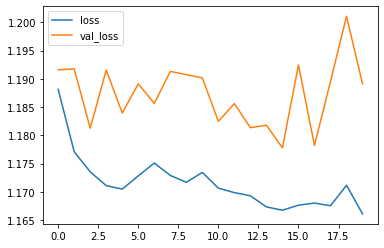

In [133]:
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()

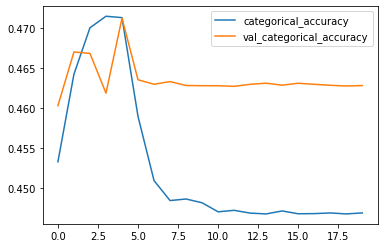

In [134]:
pd.DataFrame(history.history)[['categorical_accuracy', 'val_categorical_accuracy']].plot()

---

In [135]:
model = models.load_model('./saved_model/dart_switch_0511_F.h5')

In [136]:
df_table_testday = pd.concat(lt_df[54:], ignore_index=True)

In [137]:
# df_table_testday.drop_duplicates(inplace=True, ignore_index=True)

In [138]:
df_table_testday.describe()

,knn_rank,NN_rank,DIN_rank,DIEN_rank,label,hist_len
count,370066.00,370066.00,370066.00,370066.00,370066.00,370066.00
mean,20.29,20.62,44.65,46.63,0.88,4.03
std,24.08,22.63,27.13,30.25,1.00,110.96
min,1.00,1.00,1.00,1.00,0.00,1.00
25%,3.00,4.00,21.00,16.00,0.00,1.00
50%,10.00,11.00,43.00,47.00,1.00,2.00
75%,29.00,30.00,67.00,73.00,1.00,4.00
max,99.00,99.00,99.00,99.00,3.00,36603.00


In [139]:
df_table_testday = pd.merge(df_table_testday, pd.DataFrame(table_grby.size()), on=['target_iid'], how='left')

In [140]:
df_table_testday.rename(columns = {0:'occur'}, inplace=True)

In [141]:
df_table_testday['occur'].fillna(1, inplace=True)

In [142]:
# model.predict(np.append(emb['47952b7eb86711e9b28dacde48001122'], 0.3).reshape(1, -1))[0]

In [143]:
# np.argmax(model.predict(np.append(emb['47952b7eb86711e9b28dacde48001122'], 0.3).reshape(1, -1))[0])

In [144]:
# sum(model.predict(np.append(emb['47952b7eb86711e9b28dacde48001122'], 0.3).reshape(1, -1))[0])

In [145]:
def pred(df):
    if str(df['target_iid']) not in emb:
        return 0
    else:
        return np.argmax(model.predict(np.append(emb[str(df['target_iid'])], df['occur_log']).reshape(1, -1))[0])

In [146]:
def label_switch(df):
    label = df['pred']
    rank = None
    if label == 0:
        rank = df['knn_rank']
    elif label == 1:
        rank = df['NN_rank']
    elif label == 2:
        rank = df['DIN_rank']
    elif label == 3:
        rank = df['DIEN_rank']
    return rank

In [147]:
max_occur = max(df_table_testday['occur'])

In [148]:
df_table_testday['occur_log'] = df_table_testday.apply(lambda df: log10(df['occur'])/log10(max_occur), axis=1)

In [149]:
df_table_testday['pred'] = df_table_testday.apply(pred, axis=1)

In [150]:
df_table_testday['pred_rank'] = df_table_testday.apply(label_switch, axis=1)

In [151]:
df_table_testday.describe()

,knn_rank,NN_rank,DIN_rank,DIEN_rank,label,hist_len,occur,occur_log,pred,pred_rank
count,370066.00,370066.00,370066.00,370066.00,370066.00,370066.00,370066.00,370066.00,370066.00,370066.00
mean,20.29,20.62,44.65,46.63,0.88,4.03,20.77,0.23,0.00,20.29
std,24.08,22.63,27.13,30.25,1.00,110.96,48.22,0.22,0.03,24.08
min,1.00,1.00,1.00,1.00,0.00,1.00,1.00,0.00,0.00,1.00
25%,3.00,4.00,21.00,16.00,0.00,1.00,1.00,0.00,0.00,3.00
50%,10.00,11.00,43.00,47.00,1.00,2.00,4.00,0.19,0.00,10.00
75%,29.00,30.00,67.00,73.00,1.00,4.00,17.00,0.39,0.00,29.00
max,99.00,99.00,99.00,99.00,3.00,36603.00,1511.00,1.00,2.00,99.00


In [152]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(df_table_testday['label'].tolist(),df_table_testday['pred'].tolist()))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.45      1.00      0.62    167735
           1       0.47      0.00      0.00    120798
           2       0.04      0.00      0.00     39044
           3       0.00      0.00      0.00     42489

    accuracy                           0.45    370066
   macro avg       0.24      0.25      0.16    370066
weighted avg       0.36      0.45      0.28    370066



In [61]:
df_table_testday

,uid,hist_iid,target_iid,next_iid,knn_rank,NN_rank,DIN_rank,DIEN_rank,label,hist_len,train_label,occur,occur_log,pred,pred_rank
0,00095d29-8191-45d2-811a-11fa7efd3c6b,7ff7d8f4b86911e9b23cacde48001122,7ff7d8f4b86911e9b23cacde48001122,0b28ca68b86c11e9bea9acde48001122,32,10,95.00,27,1,1,"[0.0, 1.0, 0.0, 0.0]",1.00,0.00,0,32
1,0009c0fb-18a6-40a3-8ed1-f44c68b6554c,1746bdb6b86711e9ad61acde48001122/22287eeeb8681...,1746bdb6b86711e9ad61acde48001122,07213466b86711e9945aacde48001122,2,14,20.00,49,0,5,"[1.0, 0.0, 0.0, 0.0]",1.00,0.00,0,2
2,000e78e1-03c5-40d8-b2c5-00b975a4ed40,f5a24d1ab86611e9a7ceacde48001122/473e3580b8671...,473e3580b86711e9a122acde48001122,f5a24d1ab86611e9a7ceacde48001122,3,3,49.00,81,0,2,"[1.0, 0.0, 0.0, 0.0]",1.00,0.00,0,3
3,0011c8ba-40bc-4783-bffe-633700c1eba9,e32f027ab86611e9ac27acde48001122/e32f027ab8661...,6c57043ab86711e98760acde48001122,17405c1eb86711e9bba1acde48001122,3,4,40.00,66,0,5,"[1.0, 0.0, 0.0, 0.0]",2.00,0.09,0,3
4,00181d9e-2edf-4425-8605-a6cae2c653ba,e326ab74b86611e99f7eacde48001122,e326ab74b86611e99f7eacde48001122,e32f628ab86611e9a545acde48001122,2,2,20.00,21,0,1,"[1.0, 0.0, 0.0, 0.0]",99.00,0.63,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370061,ffc142d4-b375-457d-8c0d-9cead9c8ea38,f5c3abf4b86611e9ab61acde48001122,f5c3abf4b86611e9ab61acde48001122,17556852b86711e9af78acde48001122,9,10,30.00,84,0,1,"[1.0, 0.0, 0.0, 0.0]",6.00,0.24,0,9
370062,ffd7863f-ee7a-4e22-a1fa-fb06c8086a5b,0c3916e8b86b11e993adacde48001122/fb7b428ab86d1...,fb7b428ab86d11e99440acde48001122,0c3916e8b86b11e993adacde48001122,51,25,51.00,3,3,2,"[0.0, 0.0, 0.0, 1.0]",1.00,0.00,0,51
370063,ffeab4eb-ba97-4254-8de3-28216a3985f8,e32736beb86611e9b0b7acde48001122/e3820c1ab8661...,e3273698b86611e9ac17acde48001122,e35f6afab86611e9bd1facde48001122,5,38,77.00,92,0,3,"[1.0, 0.0, 0.0, 0.0]",4.00,0.19,0,5
370064,ffeea55f-0681-4516-9f60-5430703cc78f,46eccfbab86711e9bcb7acde48001122/1772d49eb8671...,1772d49eb86711e9b25bacde48001122,46eccfbab86711e9bcb7acde48001122,3,7,54.00,18,0,4,"[1.0, 0.0, 0.0, 0.0]",5.00,0.22,0,3
